In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

print(torch.__version__,torch.cuda.is_available())

2.6.0+cu124 True


In [2]:
import requests
from pathlib import Path
import zipfile 
import subprocess
file_path = Path("mini_food")

image_path = file_path /"pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists")
    
else:
    command = list("chmod +rwx mini_food".split())
    print(command)
    subprocess.run(command,shell=True)
    image_path.mkdir(parents=True,exist_ok=True)
    
    with open(file_path / "pizza_steak_sushi.zip","wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)
        print("successfully downloaded dataset")
        
    
    with zipfile.ZipFile(file_path / "pizza_steak_sushi.zip","r") as z:
        print("unzipping....")
        z.extractall(image_path)



mini_food/pizza_steak_sushi directory exists


In [3]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'mini_food/pizza_steak_sushi'.
There are 3 directories and 0 images in 'mini_food/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'mini_food/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'mini_food/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'mini_food/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'mini_food/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'mini_food/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'mini_food/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'mini_food/pizza_steak_sushi/test/sushi'.


In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir,test_dir

(PosixPath('mini_food/pizza_steak_sushi/train'),
 PosixPath('mini_food/pizza_steak_sushi/test'))

Random image path: mini_food/pizza_steak_sushi/test/pizza/3092704.jpg
Image class: pizza
Image height: 512
Image width: 512


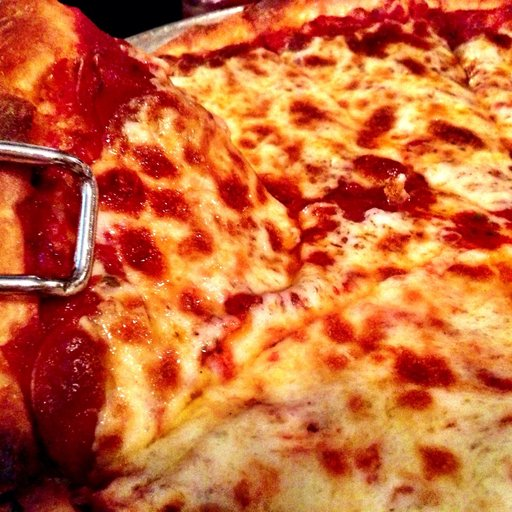

In [6]:
import random
from PIL import Image

# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))


random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'pizza Image')

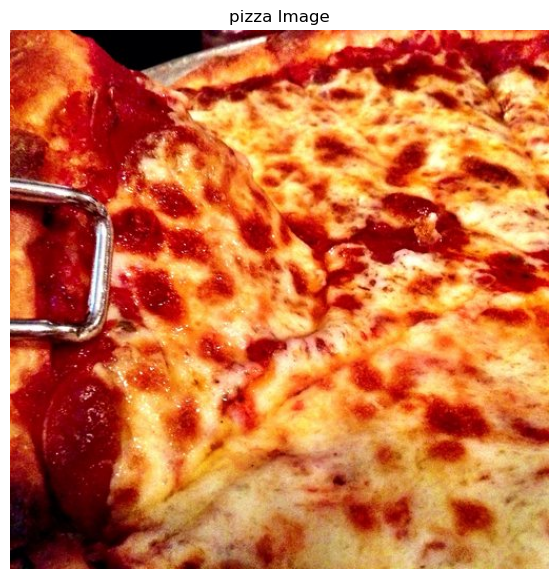

In [7]:
import numpy as np
import matplotlib.pyplot as plt


image_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(image_array)
plt.axis(False)
plt.title(f"{image_class} Image")


In [8]:
data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

In [9]:
data_transform(img)

tensor([[[0.8078, 0.9216, 0.9647,  ..., 0.8196, 0.7765, 0.6941],
         [0.7098, 0.8431, 0.8549,  ..., 0.8510, 0.7843, 0.7255],
         [0.7922, 0.8549, 0.8980,  ..., 0.7529, 0.7373, 0.7137],
         ...,
         [0.8980, 0.8745, 0.8353,  ..., 0.0706, 0.0588, 0.1059],
         [0.9137, 0.8706, 0.8392,  ..., 0.1216, 0.0353, 0.0392],
         [0.8980, 0.8745, 0.8431,  ..., 0.0824, 0.0980, 0.2235]],

        [[0.1412, 0.3647, 0.5804,  ..., 0.3020, 0.2471, 0.1804],
         [0.0431, 0.1333, 0.2196,  ..., 0.3961, 0.2941, 0.1922],
         [0.1176, 0.1216, 0.2353,  ..., 0.2118, 0.2314, 0.2235],
         ...,
         [0.7961, 0.7686, 0.7098,  ..., 0.0039, 0.0039, 0.0078],
         [0.8078, 0.7216, 0.6706,  ..., 0.0078, 0.0039, 0.0039],
         [0.7804, 0.7216, 0.6706,  ..., 0.0078, 0.0196, 0.0314]],

        [[0.1255, 0.2000, 0.2980,  ..., 0.1216, 0.1294, 0.0980],
         [0.0902, 0.1490, 0.1490,  ..., 0.1725, 0.1176, 0.0863],
         [0.0941, 0.1529, 0.1882,  ..., 0.1059, 0.1176, 0.

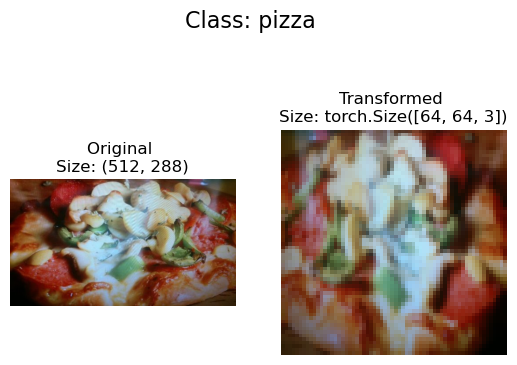

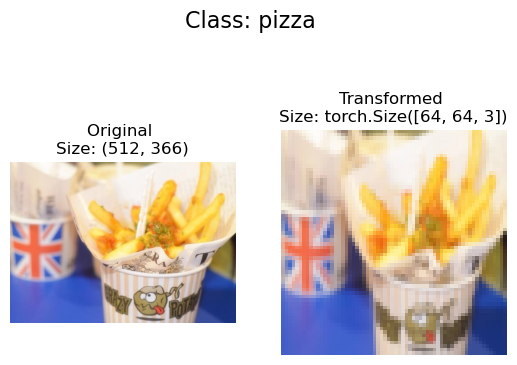

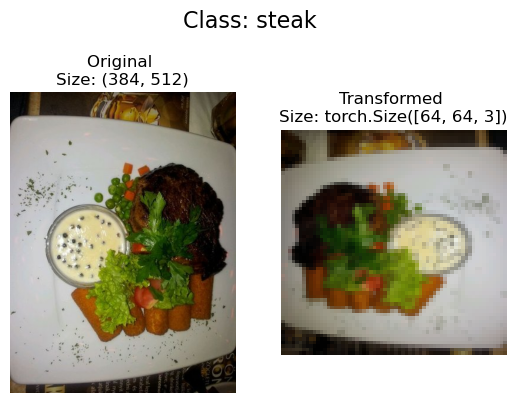

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [11]:
a = torch.rand([4,2,4])
print(a.shape)
a = a.permute(0,2,1)
a.shape

torch.Size([4, 2, 4])


torch.Size([4, 4, 2])

In [12]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform = data_transform
)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: mini_food/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: mini_food/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
class_names,class_dict = train_data.classes,train_data.class_to_idx
class_names,class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [14]:
import os
os.cpu_count()

24

In [15]:
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()-2
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=NUM_WORKERS,
    num_workers=NUM_WORKERS
)
train_dataloader,test_dataloader,len(train_dataloader),len(test_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7a5e8c22fd30>,
 15,
 4)

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [17]:
class MiniFoodCNN(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=2,
                stride=1,
                padding=1
            ),
            
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=2,
                stride=1,
                padding=1
            ),
            
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=2
            )
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                padding=1,
                stride=1
            ),
            
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=4,
                padding=1,
                stride=1
            ),
            
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=2
            )
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )        
    def forward(self,x):
        x = x.to(device=device)
        
        x = self.conv_block_1(x)
        # print(x.shape)
        
        x = self.conv_block_2(x)
        # print(x.shape)
        
        x = self.classifier(x)
        
        return x

In [18]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn
from timeit import default_timer as timer


torch.manual_seed(42)


def execution_time(start_time,end_time, device):
    total_time = end_time-start_time
    print(f"Train Time on {device} is {total_time:.4f}")
    return total_time


def train_step(model,optimizer,loss_fn,train_dataloader,device):
    
    train_loss,train_acc = 0,0
    
    for batch,(X,y) in enumerate(train_dataloader):
        
        X = X.to(device)
        y = y.to(device)
        
        model.train()
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred,y)
        train_loss += loss
        
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    train_loss /=len(train_dataloader)
    train_acc /=len(train_dataloader)
    print(f" Train Loss: {train_loss:.4f} || Train Accuracy {train_acc:.2f}%")
    return train_loss,train_acc


def test_step(model,loss_fn,test_dataloader,device):
    test_loss,test_acc = 0.0,0
    
    model.eval()
    
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            X_test,y_test = X_test.to(device),y_test.to(device)
            test_pred = model(X_test)
            
            test_loss+=loss_fn(test_pred,y_test)
            
            test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1))
            
        test_loss/=len(test_dataloader)
        
        test_acc/=len(test_dataloader)

    print(f" Test Loss: {test_acc:.4f} || Test Accuracy {test_acc:.2f}%\n")
    
    return test_loss,test_acc
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            
            X,y =X.to(device),y.to(device)
            y_pred = model(X)
            
            
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) 
        
        
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}

In [19]:
model = MiniFoodCNN(input_shape=3,hidden_units=10,output_shape=len(class_names)).to(device)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.05)
loss_fn = nn.CrossEntropyLoss()
epochs = 1


In [20]:
# !pip install torchinfo

from torchinfo import summary

summ_model = MiniFoodCNN(input_shape=3,hidden_units=10,output_shape=len(class_names))
summary(model=summ_model,input_size=(BATCH_SIZE,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
MiniFoodCNN                              [16, 3]                   --
├─Sequential: 1-1                        [16, 10, 33, 33]          --
│    └─Conv2d: 2-1                       [16, 10, 65, 65]          130
│    └─ReLU: 2-2                         [16, 10, 65, 65]          --
│    └─Conv2d: 2-3                       [16, 10, 66, 66]          410
│    └─ReLU: 2-4                         [16, 10, 66, 66]          --
│    └─MaxPool2d: 2-5                    [16, 10, 33, 33]          --
├─Sequential: 1-2                        [16, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [16, 10, 33, 33]          910
│    └─ReLU: 2-7                         [16, 10, 33, 33]          --
│    └─Conv2d: 2-8                       [16, 10, 32, 32]          1,610
│    └─ReLU: 2-9                         [16, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [16, 10, 16, 16]          --
├─Sequent

In [ ]:
def train(model,optimizer,loss_fn,train_dataloader,test_dataloader,epochs,device):
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    train_time_start = timer()


    for epoch in tqdm(range(epochs)):        
        train_loss,train_acc =  train_step(model,optimizer,loss_fn,train_dataloader,device)
        
        test_loss,test_acc = test_step(model,loss_fn,test_dataloader,device)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)
    train_time_end = timer()

    total_time = execution_time(train_time_start,train_time_end,device)

    return results
def plot_loss_curves(results):
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    



In [51]:
model = MiniFoodCNN(input_shape=3,hidden_units=10,output_shape=len(class_names)).to(device)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 200
model_results = train(model,optimizer,loss_fn,train_dataloader,test_dataloader,epochs,device)

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 0

 Train Loss: 1.0994 || Train Accuracy 33.75%
 Test Loss: 21.5909 || Test Accuracy 21.59%

Epoch: 1 | train_loss: 1.0994 | train_acc: 33.7500 | test_loss: 1.1060 | test_acc: 21.5909
Epoch 1

 Train Loss: 1.1008 || Train Accuracy 31.25%
 Test Loss: 26.1364 || Test Accuracy 26.14%

Epoch: 2 | train_loss: 1.1008 | train_acc: 31.2500 | test_loss: 1.1084 | test_acc: 26.1364
Epoch 2

 Train Loss: 1.1017 || Train Accuracy 31.25%
 Test Loss: 28.4091 || Test Accuracy 28.41%

Epoch: 3 | train_loss: 1.1017 | train_acc: 31.2500 | test_loss: 1.0994 | test_acc: 28.4091
Epoch 3

 Train Loss: 1.0997 || Train Accuracy 32.50%
 Test Loss: 50.0000 || Test Accuracy 50.00%

Epoch: 4 | train_loss: 1.0997 | train_acc: 32.5000 | test_loss: 1.0934 | test_acc: 50.0000
Epoch 4

 Train Loss: 1.1003 || Train Accuracy 30.00%
 Test Loss: 21.5909 || Test Accuracy 21.59%

Epoch: 5 | train_loss: 1.1003 | train_acc: 30.0000 | test_loss: 1.1010 | test_acc: 21.5909
Epoch 5

 Train Loss: 1.0989 || Train Accuracy 29.

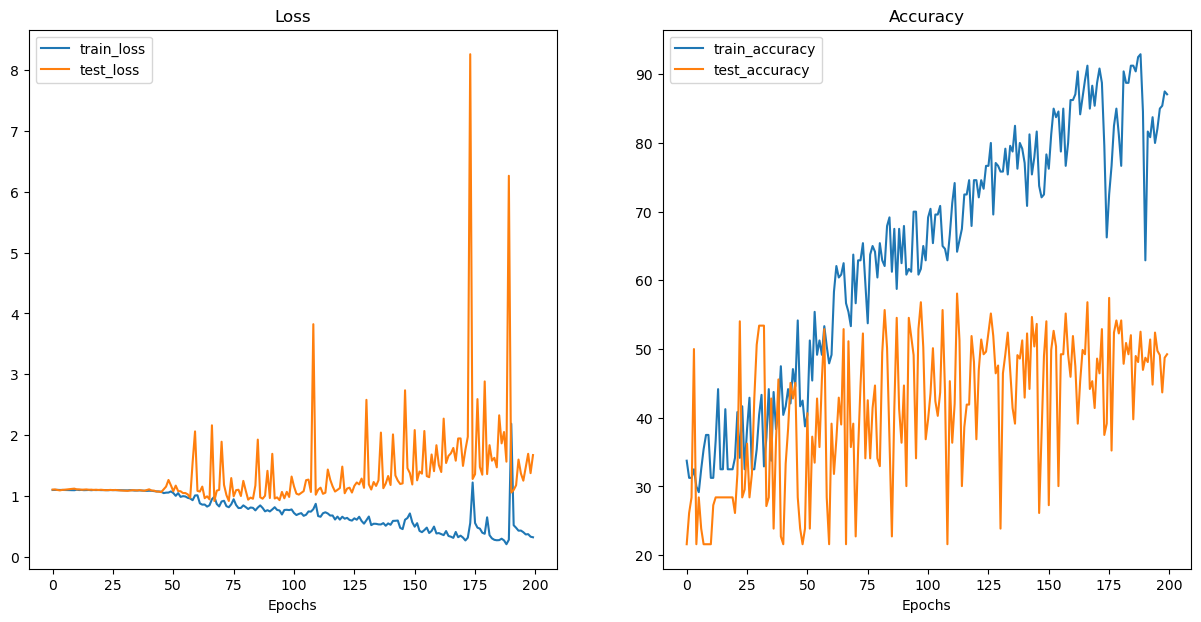

In [52]:
plot_loss_curves(model_results)

In [53]:
eval_model(model,test_dataloader,loss_fn,accuracy_fn,device)

{'model_name': 'MiniFoodCNN',
 'model_loss': 1.6050326824188232,
 'model_acc': 46.96969696969697}

In [54]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = file_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [56]:
import torchvision

# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

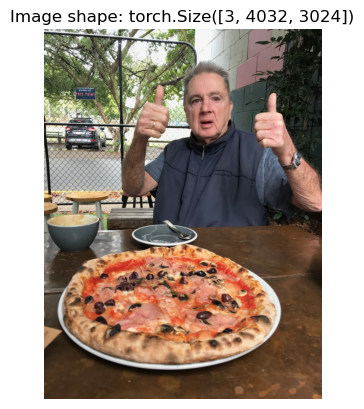

In [57]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [58]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [60]:
model.eval()
with torch.inference_mode():
    custom_image_pred = model(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [61]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [62]:
custom_image_pred


tensor([[ 0.9192, -1.6150, -0.1656]], device='cuda:0')

In [64]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {class_names[custom_image_pred_label]}")

Prediction logits: tensor([[ 0.9192, -1.6150, -0.1656]], device='cuda:0')
Prediction probabilities: tensor([[0.7056, 0.0560, 0.2385]], device='cuda:0')
Prediction label: pizza


In [ ]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

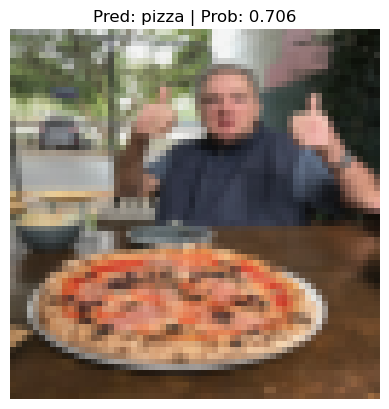

In [68]:
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)